In [1]:
import pandas as pd
#Plot
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def make_density(df,color, x_axis_text, y_axis_text, bins, x, y=None, kde=True, show_mean=False, show_other=False):
    
    sns.set_context(rc = {'edgecolor':color})
    # Draw the histogram and fit a density plot.
    ax = sns.histplot(df,x=x, bins=bins, kde=kde,
                      line_kws={'linewidth': 2}, color=color)
    if show_mean:
        # compute mode of the histogram.
        mean_x = df[x].mean()

        # draw a vertical line at the mode of the histogram.
        ax.axvline(mean_x, color='orange', linestyle='dashed', linewidth=1.5)
        ax.text(mean_x+0.1*mean_x, ax.get_ylim()[1]/2, '$\mu = {}$'.format(round(mean_x,2)))
    if show_other:
        std_x = df[x].std()
        min_x = df[x].min()
        max_x = df[x].max()
        # title
        ax.set_title('$\sigma = {}$ | $min = {}$ | $max = {}$'.format(round(std_x, 2),round(min_x,2),round(max_x,2)))
    # Plot formatting
    ax.set_xlabel(x_axis_text)
    ax.set_ylabel(y_axis_text)
    return ax

In [2]:
eval_res = pd.read_csv('D:\\Various documents\\Masters\\Subjects\\Thesis\\Evaluation\\Evaluation_summary.csv')

In [14]:
eval_res.head()

,Index,Project _id,Model,Recommendation_1,Recommendation_2,Recommendation_3,Recommendation_4,Recommendation_5,Correct
0,720,SOL-28309,Model III,0,0,0,0,0,0
1,411,SOL-144622,Model III,0,0,0,0,0,0
2,2242,SOL-144694,Model III,0,0,0,0,0,0
3,2798,SOL-63103,Model III,0,0,1,1,1,3
4,3151,SOL-27234,Model III,0,1,0,0,1,2


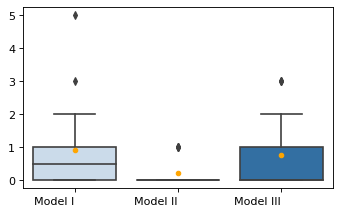

In [23]:
fig = plt.figure(figsize=(5,3),dpi=80)
ax = sns.boxplot(y=eval_res['Correct'], x=eval_res['Model'], order = ["Model I", "Model II", "Model III"], palette = "Blues",
                 showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"orange", 
                       "markeredgecolor":"orange",
                      "markersize":"4"})
ax.set_ylabel("")
ax.set_xlabel("")

plt.xticks(rotation=0, ha='right',fontsize=10)
fig.savefig("D:\\Various documents\\Masters\\Subjects\\Thesis\\Evaluation\\boxplot_models.png")

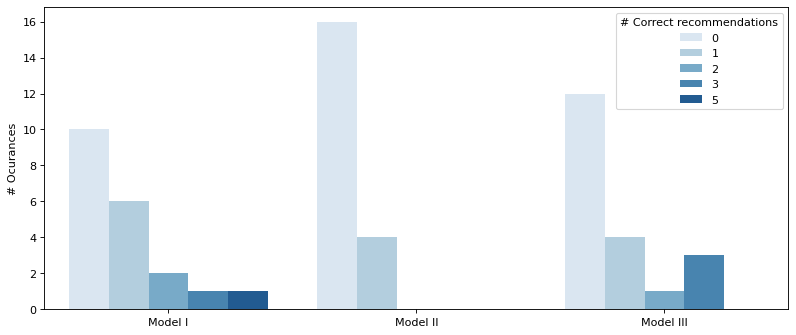

In [49]:
fig = plt.figure(figsize=(12,5),dpi=80)
#sns.color_palette("mako", as_cmap=True)
df = (eval_res.groupby(['Model','Correct'])['Index'].count().reset_index()).rename(columns={'Index':'count'})
ax = sns.barplot(x = "Model", y='count', hue ="Correct", data = df, palette="Blues") #hue = "Model"  order = ["Model I", "Model II", "Model III"],

ax.set_xlabel("")
ax.set_ylabel("# Ocurances")
plt.legend(loc='upper right', title="# Correct recommendations")
fig.savefig("D:\\Various documents\\Masters\\Subjects\\Thesis\\Evaluation\\bar_models.png")

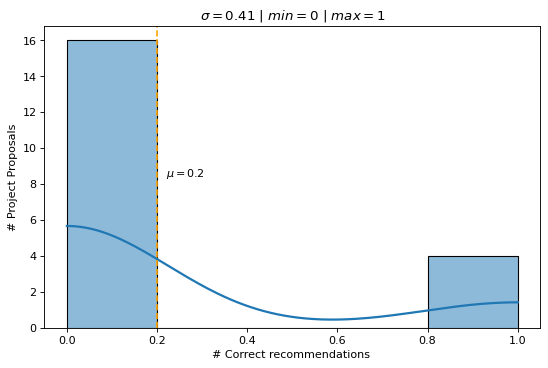

In [25]:
# Distribution of number of words per Employee
plt.figure(figsize=(8,5), dpi= 80)
ax = make_density(df=eval_res[eval_res['Model']=='Model II'], color='#1f77b4',x_axis_text='# Correct recommendations ', y_axis_text='# Project Proposals', bins=5, 
             x='Correct', y=None, kde=True, show_mean=True, show_other=True)
#plt.xlim(0,1000)
plt.show()
fig = ax.get_figure()